EJERCICIO 2:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [2]:
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])

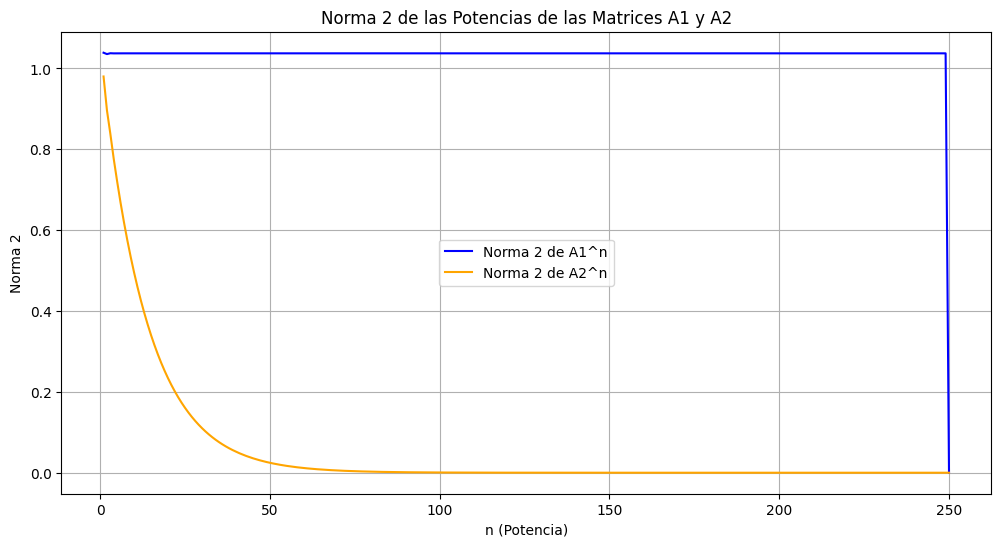

In [5]:
N = 250

a1 = np.zeros(N)
a2 = np.zeros(N)

for i in range(0,N-1):
  a1[i] = norm(np.linalg.matrix_power(A1, i + 1), ord=2)
  a2[i] = norm(np.linalg.matrix_power(A2, i + 1), ord=2)

plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), a1, label='Norma 2 de A1^n', color='blue')
plt.plot(range(1, N + 1), a2, label='Norma 2 de A2^n', color='orange')
plt.title('Norma 2 de las Potencias de las Matrices A1 y A2')
plt.xlabel('n (Potencia)')
plt.ylabel('Norma 2')
plt.legend()
plt.grid()
plt.show()

EJERCICIO 3:

In [15]:
def metodoPotencia(A,num_iteraciones):
  tolerancia = 1e-6
  autovalores = []
  n = A.shape[0]

  for _ in range(num_iteraciones):
    x0 = np.random.rand(n)
    x0 = x0 / np.linalg.norm(x0)

    while True:
      x1 = A@x0
      x1 = x1/np.linalg.norm(x1)
      if (np.linalg.norm(x1 - x0)) < tolerancia :
        break
      x0 = x1

    autovalor = x0.T @ A @ x0
    autovalores.append(autovalor)

  promedio = np.mean(autovalores)
  desviacion_estandar = np.std(autovalores)
  maxaval = max(autovalores)

  return promedio, desviacion_estandar , maxaval

# que onda la toleracia de convergencia entre vectores ? puedo asumir que siempre existe convergencia ?

In [16]:

p1,d1,a1 = metodoPotencia(A1,250)
print ("El autovalor mas grande de A1 es: " + str(a1))

p2,d2,a2 = metodoPotencia(A2,250)
print ("El autovalor mas grande de A2 es: " + str(a2))

El autovalor mas grande de A1 es: 1.000000057083764
El autovalor mas grande de A2 es: 0.9276516166359907


In [17]:
import pandas as pd

data = {
    'Matriz': ['A1', 'A2'],
    'Promedio Autovalores': [p1, p2],
    'Desviación Estándar': [d1, d2]
}

tabla = pd.DataFrame(data)

# Mostrar la tabla
print(tabla)

  Matriz  Promedio Autovalores  Desviación Estándar
0     A1              1.000000         3.377977e-08
1     A2              0.927651         1.094951e-07


EJERCICIO 4:

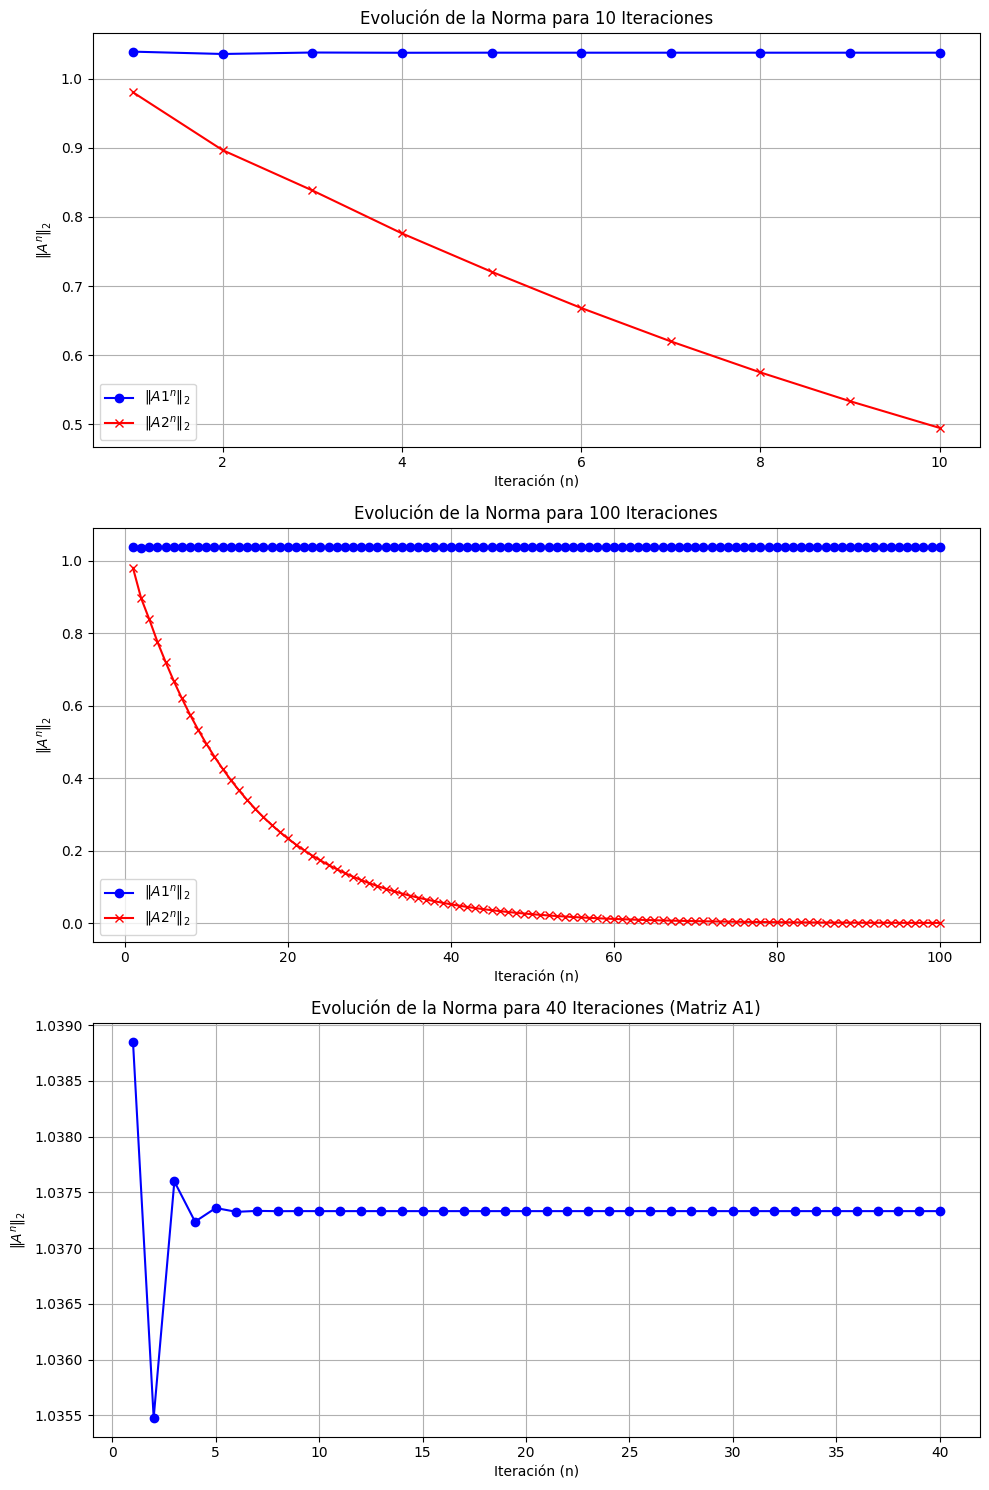

In [30]:

def sucesion_de_potencias(A,k):
  normas = []
  A_potencia = np.eye(A.shape[0])

  for i in range(1,k + 1 ):
    A_potencia = A_potencia@A
    norma = norm(A_potencia, 2)
    normas.append(norma)

  return normas

normasA1_10 = sucesion_de_potencias(A1,10)
normasA2_10 = sucesion_de_potencias(A2,10)

normasA1_100 = sucesion_de_potencias(A1,100)
normasA2_100 = sucesion_de_potencias(A2,100)


normasA1_40 = sucesion_de_potencias(A1,40)

# GRAFICOS

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de la serie de normas para 10 iteraciones
ax1.plot(range(1, len(normasA1_10) + 1), normasA1_10, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax1.plot(range(1, len(normasA2_10) + 1), normasA2_10, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax1.set_xlabel('Iteración (n)')
ax1.set_ylabel(r'$\|A^n\|_2$')
ax1.set_title('Evolución de la Norma para 10 Iteraciones')
ax1.legend()
ax1.grid(True)

# Gráfico de la serie de normas para 100 iteraciones
ax2.plot(range(1, len(normasA1_100) + 1), normasA1_100, marker='o', color='b', label=r'$\|A1^n\|_2$')
ax2.plot(range(1, len(normasA2_100) + 1), normasA2_100, marker='x', color='r', label=r'$\|A2^n\|_2$')
ax2.set_xlabel('Iteración (n)')
ax2.set_ylabel(r'$\|A^n\|_2$')
ax2.set_title('Evolución de la Norma para 100 Iteraciones')
ax2.legend()
ax2.grid(True)

# Gráfico de la serie de normas de A1 para 40 iteraciones
ax3.plot(range(1, len(normasA1_40) + 1), normasA1_40, marker='o', color='b')
ax3.set_xlabel('Iteración (n)')
ax3.set_ylabel(r'$\|A^n\|_2$')
ax3.set_title('Evolución de la Norma para 40 Iteraciones (Matriz A1)')
ax3.grid(True)

# Ajuste de la distribución de subgráficos
plt.tight_layout()
plt.show()




Notemos que hay convergencia solo para la matriz A2, esto pues la serie de potencias de su norma converge. Su convergencia es hacia 0, y A1 no converge, sino que comienza a oscilar de forma constante al rededor del valor 1.0374.
Una regla general para que la serie infinita de normas de las potencias de una matriz converga es que el mayor autovalor en valor absoluto de la matriz sea menor que 1 , es decir que su radio espectral lo sea.
para nuestro ejemplo, recordemos que el autovalor de A1 era igual a 1.0000000895350079 y el de A2 era menor, exactamente 0.9276516098096924.

In [ ]:
#falta inciso (d)